## Team Family Friendly Presents: The Best Neighborhood to raise a family

For our analysis, we wanted to find the best neighborhood in Pittsburgh to raise a family because family is important. 

To determine this, we looked at three different datasets:

1. The Median Age of Death in the different neighborhoods. The explanation for this dataset is in the name, as it looks at the age people died in the different neighborhoods around Pittsburgh
2. The Number of Speed Humps in the different neighborhoods around Pittsburgh. This dataset looks at the different speed humps around Pittsburgh.
3. The Number of playing areas in the different neighborhoods. This is composed of the different sums of playing fields and playgrounds around Pittsburgh

In [4]:
import pandas as pd
import numpy as np
import geopandas as gp
import collections
import csv
%matplotlib inline
import matplotlib.pyplot as plt

## Dataset Overview - Median Age of Death

I do not know about you all, but personally I want to life a long happy life, especially with a family. The longer family can spent time with each other the better. Therefore, I am analyzing the median age of death in each of the neighborhoods. In order for a neighborhood to be deemed the best, it must have the largest median age of death.

# Lets Begin:

In [5]:
#Calling in the data set and dropping missing values.
deaths = pd.read_csv("deaths.csv")
deaths = deaths.dropna()
deaths = deaths.drop(deaths.index[0])

## Total Median Age at Death

To deem a neighborhood the king, we must look at the total median age at death and find the neighborhood with the largest median age.

but first, to see how much greater the best neighborhood really is, lets make a density plot to visualize the median age of death in Pittsburgh:

In [6]:
med_deaths = deaths.groupby("NEIGHBORHOOD").sum()['TOTAL MD AGE AT DEATH']
med_deaths = med_deaths.sort_values(ascending = False).head(5)

The median age of death in Pittsburgh is 76.1


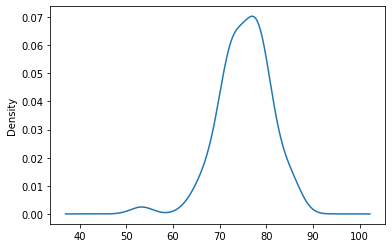

In [8]:
deaths['TOTAL MD AGE AT DEATH'].plot.density()
print("The median age of death in Pittsburgh is", deaths['TOTAL MD AGE AT DEATH'].median())

According to the density plot we can see that the data is an approximately normal distribution with a median value of 76.1 years of age.

# Bringing the Data to the Neighborhoods:

To find out which neighborhood has the highest median age of death, we can sort the data from high to low, then create a bar chart to visualize it. The bar chart will display the top 5 neighborhoods as well as their values.

In [10]:
med_deaths.sort_values(ascending = False)

NEIGHBORHOOD
SQUIRREL HILL SOUTH    85.9
NORTH OAKLAND          85.6
POINT BREEZE           85.1
SQUIRREL HILL NORTH    85.0
SWISSHELM PARK         83.1
Name: TOTAL MD AGE AT DEATH, dtype: float64

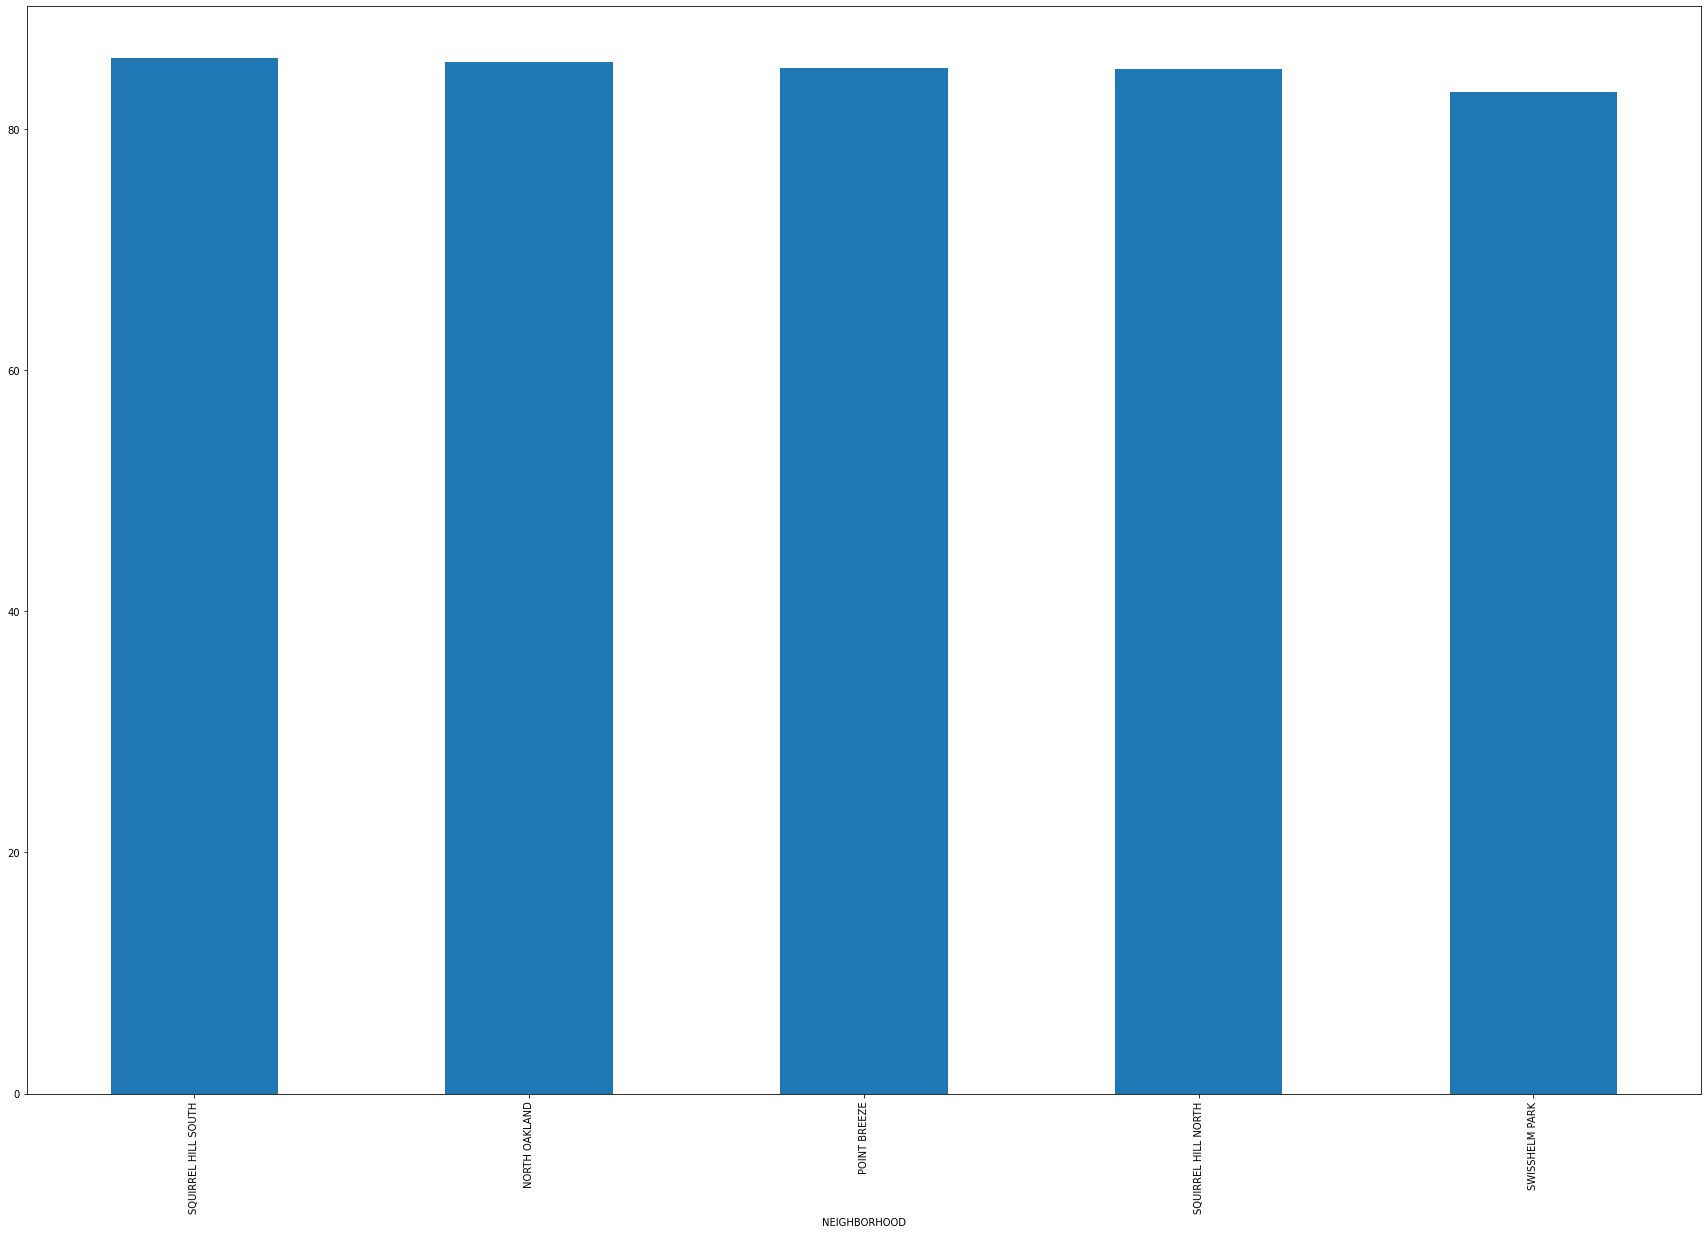

In [9]:

med_deaths.plot(kind='bar', x='NEIGHBORHOOD', y='TOTAL MD AGE AT DEATH', figsize=(30,20))

Although it is close, the data states the Squirrel Hill South is at the top of the chart, with a median age of death at 85.9 years of age. Now that is a long life. This value is 9.8 years longer than the median age of death in Pittsburgh, which is extremely impressive.

With this, we can conclude that Squirrel Hill South is the best neighborhood if you want to live a long life with your family, with North Oakland, Point Breeze, and North Squirrel Hill following close behind

## Amount of Speed Humps per Pittsburgh Suburb
For my dataset, I examined the amount of speed humps per Pittsburgh suburb, Although commonly found near schools, parks, and community centers, speed humps are great traffic enforcers. They cause the driver to slow down and obey the speed limit to avoid risk of damaging the car. If you were to start a family, you would want the safest conditions possible for your children, and speed humps help to maintain safe driving and provide an enhanced sense of awareness for the driver.

In [11]:
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

Below is the code I compiled to import the speed hump data from my humps.csv file and output it in the form of a chart, a density map, and a bar graph

,Neighborhood,Total Humps
1,Squirrel Hill South,18
13,Carrick,9
2,North Oakland,6
5,Polish Hill,6
11,Upper Hill,4
3,Brookline,4
15,South Side Slopes,4
6,Homewood South,4
14,Perry North,4
8,South Side Flats,3


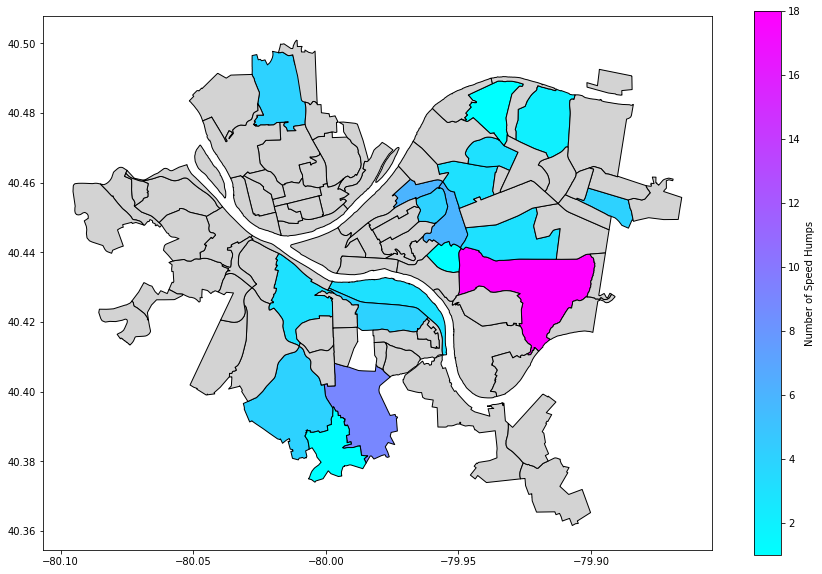

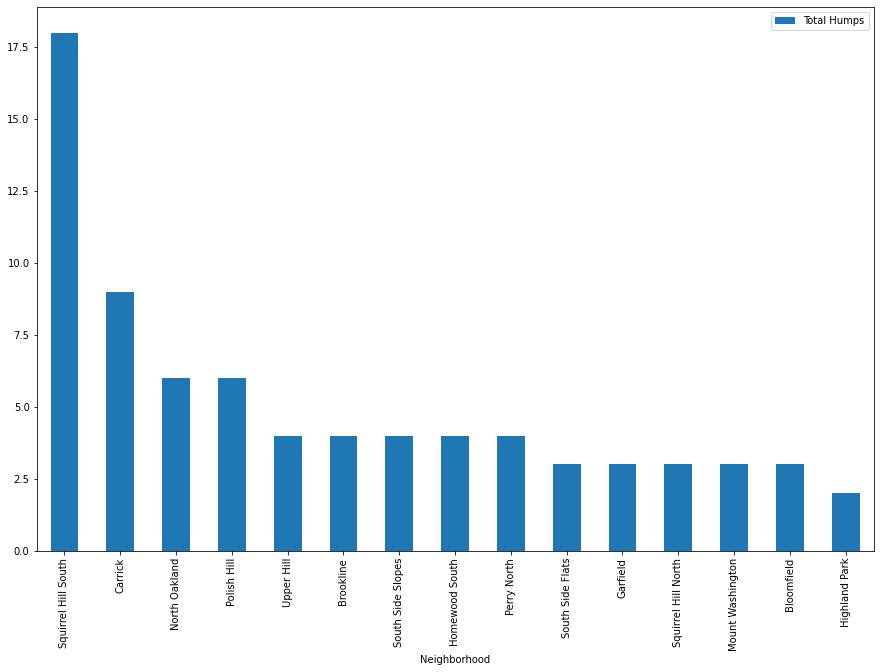

In [12]:
humps = collections.Counter()
with open('humps.csv') as data:
    for x in csv.reader(data):
        humps[x[6]] += 1
        
humps_df = pd.DataFrame.from_records(list(dict(humps).items()), columns=['Neighborhood','Total Humps'])
humps_total = humps_df.groupby('Neighborhood').sum()['Total Humps']
humps_map = neighborhoods.merge(humps_total, how='left', left_on='hood', right_on='Neighborhood')
humps_map.plot(column = "Total Humps",
              cmap='cool',
              edgecolor="black",
              legend=True,
              legend_kwds={'label': "Number of Speed Humps"},
              figsize=(15,10),
              missing_kwds={"color": "lightgrey"}
              )

highestvalues = humps_df.sort_values("Total Humps", ascending = False).head(15)
highestvalues.plot(kind = 'bar', x = "Neighborhood", y = "Total Humps", figsize=(15,10))
highestvalues

Above are three graphs showing the top 15 neighborhoods ranked by the amount of speed humps they have. There is a chart, a density map, and a bar graph. For the density map, the more purple the color is, the more speed humps the suburb has. The more sky blue the color is, the less speed humps the suburb has. Grey suburbs have been reported to have 0 speed humps. The chart lists the exact amount each suburb has and ranks them from 1-15. The bar graph shows the top 15 suburbs in order of most speed humps to least. The higher the bar, the more speed humps a suburb has.

# Top 3 Neighborhoods Based on Speed Humps
## 1. Squirrel Hill South
## 2. Carrick
## 3. Tie between North Oakland & Polish Hill
As shown by the graphs above, Squirrel Hill South has the most speed humps, providing the safest road conditions for nearby children. With 18 speed humps, Squirrel Hill South has double the amount of the suburb with the second highest amount of speed humps, which is Carrick with 9 speed humps. The remaining neighborhoods have a closer margin, and most tie up the amount. North Oakland and Polish Hill have the third most speed humps at four, then there are 5 neighborhoods each consisting of 4 speed humps, followed by 5 more neighborhoods each consisting of 3 speed humps. Although the margin for the lower ranked neighborhoods is very small, the gap between North Oakland (3) and Squirrel Hill South (18) is 15 speed humps. The best neighborhood to raise a family, based on the data collected about speed humps, is Squirrel Hill South.

## Data Set Overview and Metric- Playing Areas
For my dataset, I decided to evaluate the number of playing fields and number of playgrounds as one.

In terms of our overall metric of raising a family, playing fields and playgrounds are both very nice features to have for kids. I chose to do both because some families might use playing fields more and some may use playgrounds more so it felt unfair to only analyze one. They both serve different purposes, but contribute to childhood recreation. The data set that will be considered the "best" from my data set is the one with the most play areas. The sum of the number of playgrounds and number of playing fields is being considered the number . The data sets that I am using are both from WPRDC and contain data from 2017 to present day.

In [17]:
play_areas = collections.Counter()
with open('fields.csv') as data:
    for x in csv.reader(data):
        play_areas[x[11]] += 1
        
with open('playgrounds.csv') as data:
    for x in csv.reader(data):
        play_areas[x[7]] += 1

playareas_df = pd.DataFrame.from_records(list(dict(play_areas).items()), columns=['Neighborhood','Total'])

playareas_total = playareas_df.groupby('Neighborhood').sum()['Total']

,Neighborhood,Total
19,Squirrel Hill South,13
1,South Side Slopes,11
6,Brighton Heights,9
44,Carrick,8
12,Brookline,8
27,Beechview,8
18,Highland Park,8
39,Sheraden,7
33,Beltzhoover,7
7,Hazelwood,7


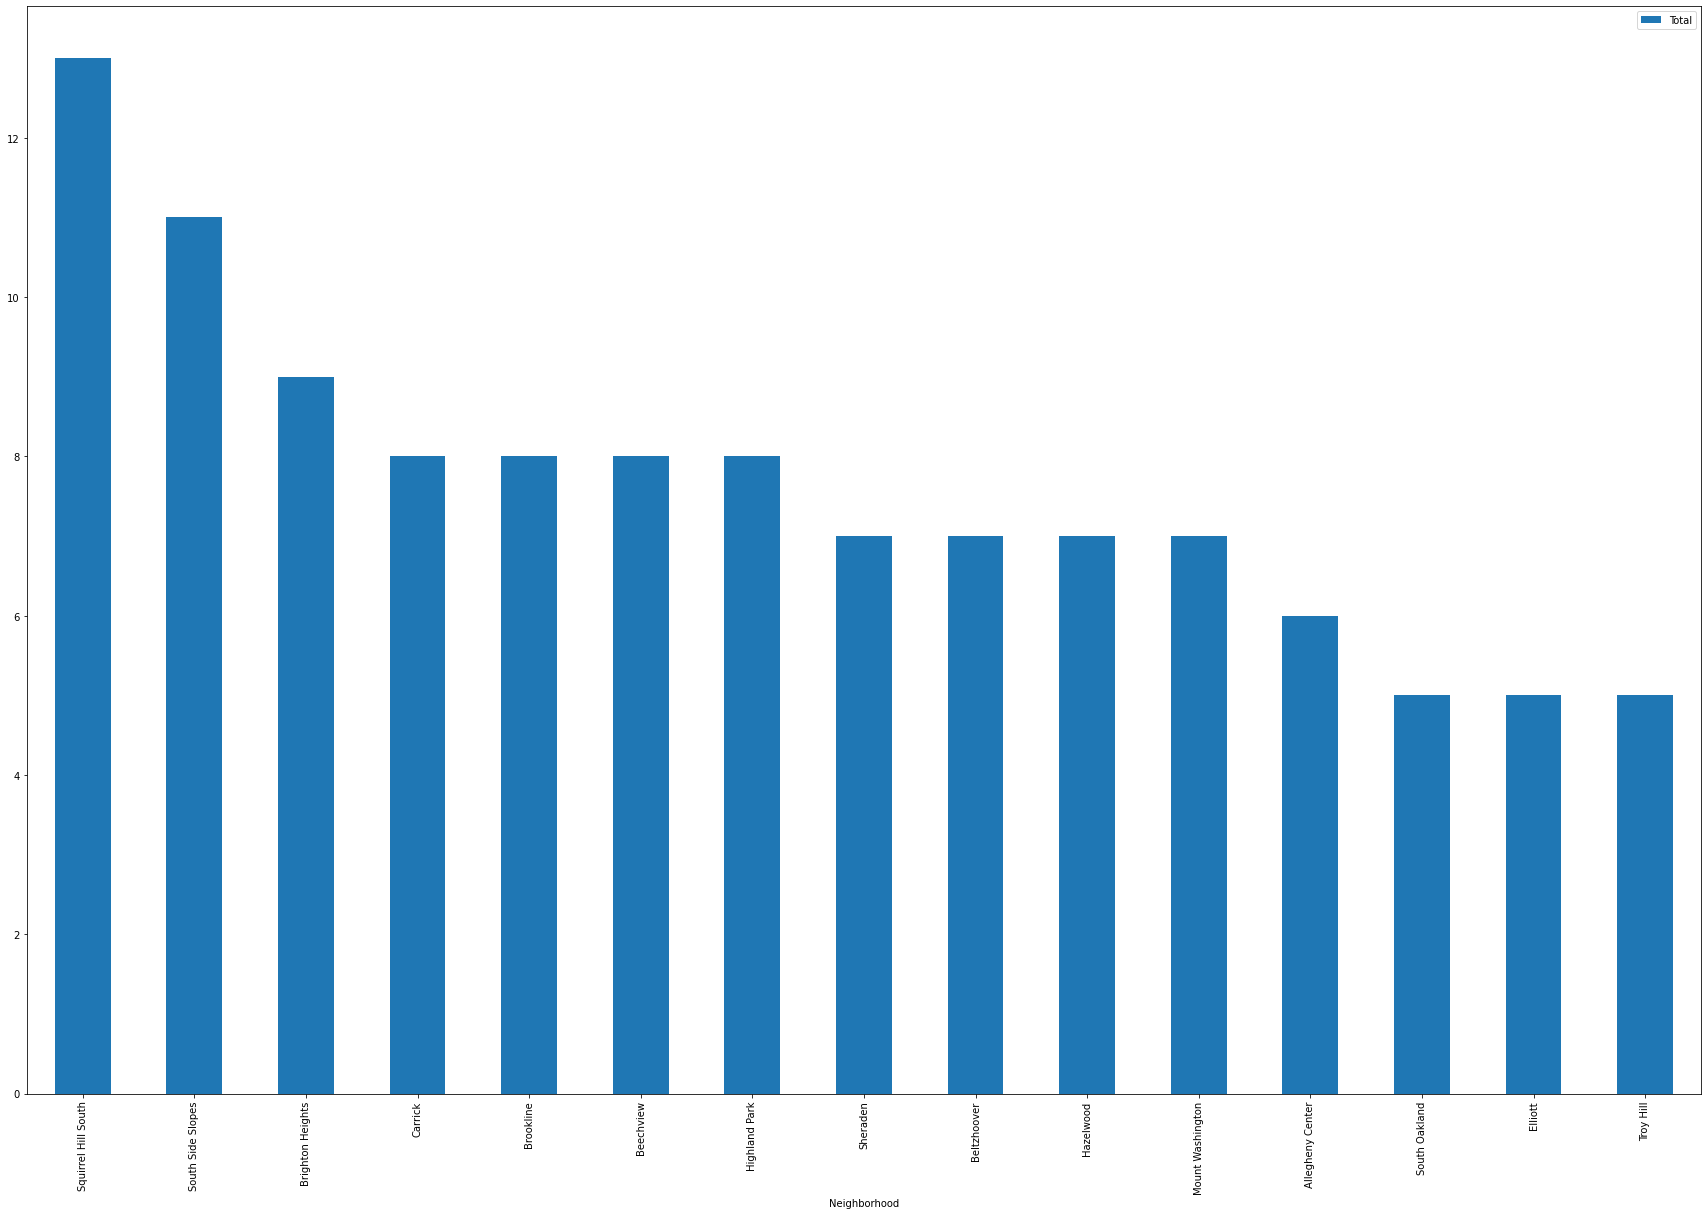

In [18]:
highestvalues = playareas_df.sort_values("Total", ascending = False).head(15)
highestvalues.plot(kind = 'bar', x = "Neighborhood", y = "Total", figsize=(30,20))
highestvalues

# Interpreting the Bar Graph
After creating a new dataframe with the neighborhoods and their corresponding total number of play areas, I created a bar graph of the top 15 neighborhoods. From the bar graph, you can clearly see that Squirrel Hill has the most with 13 and Brookline has the 5th most with 8 playareas.

The top 5 are as follows:

Squirrel Hill South
South Side Slopes
Brighton Heights
Carrick
Brookline

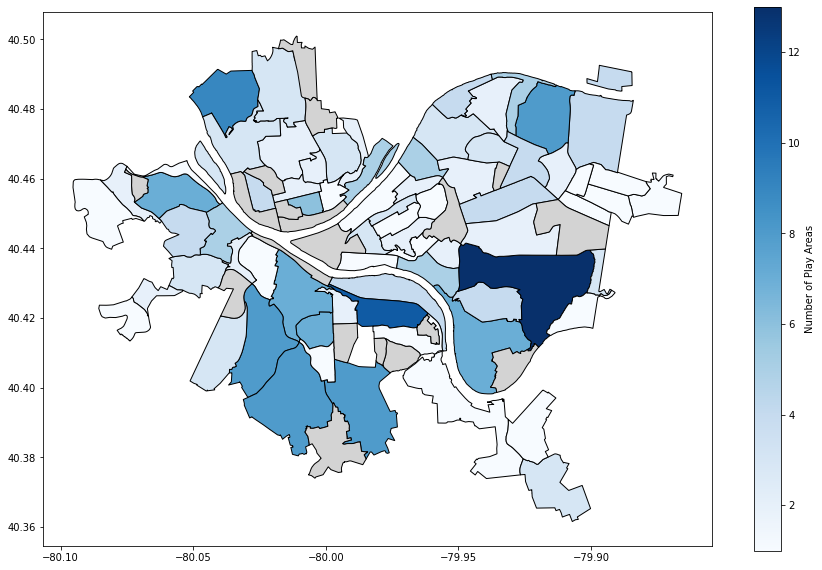

In [20]:
fields_map = neighborhoods.merge(playareas_total, how='left', left_on='hood', right_on='Neighborhood')

fields_map.plot(column = "Total",
               cmap='Blues',          
               edgecolor="black",       
               legend=True,            
               legend_kwds={'label': "Number of Play Areas"}, 
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"}
               )

# Analyzing the Graph
As you can see on the map, the data is overall very spread out and there doesn't seem to be any major patterns or clusters. Squirrel hill clearly contains the most play areas as it the darkest blue and there is a small cluster of neighborhoods with a large amount around South Side Slopes and Carrick. The grey areas represent neighborhoods that did not have a corresponding value for play areas

# Conclusion for the Play Areas
The neighborhood in Pittsburgh that should be deemed the best to raise a family based on my metric should have the most number of play areas. Based on this, Squirrel Hill South is the best neighborhood with 13 play areas followed by Southside Slopes and Brighton Heights.

# So Which Neighborhood is Best?

As a reminder, we are searching for the neighborhood that would be best to raise a family. 
Looking back at the data, it appears we have an obvious winner, as one neighborhood has been the top of all three metrics: Squirrel Hill South.

Squirrel Hill South has:
1. A median age of death value at 85.9 years for a long life with a family.
2. 18 Speedhumps to make sure the cars are not flying down the road, keeping the family safe.
3. 13 play areas to allow the kids to run around, burn their energy, and exercise.
